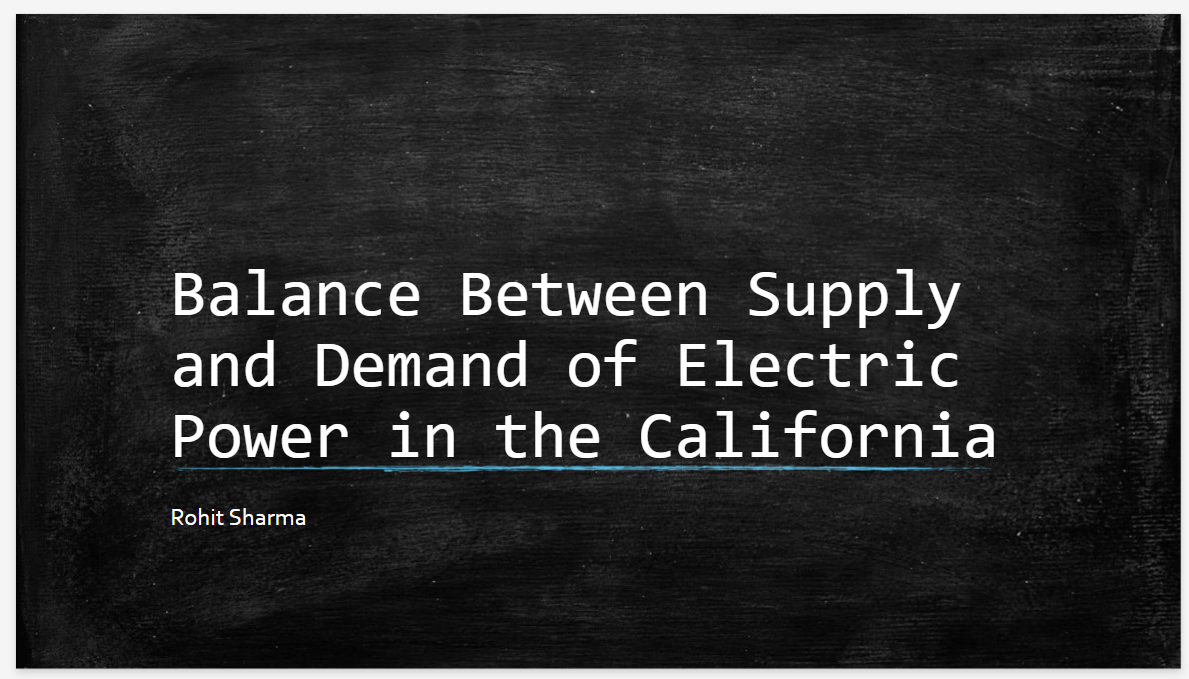

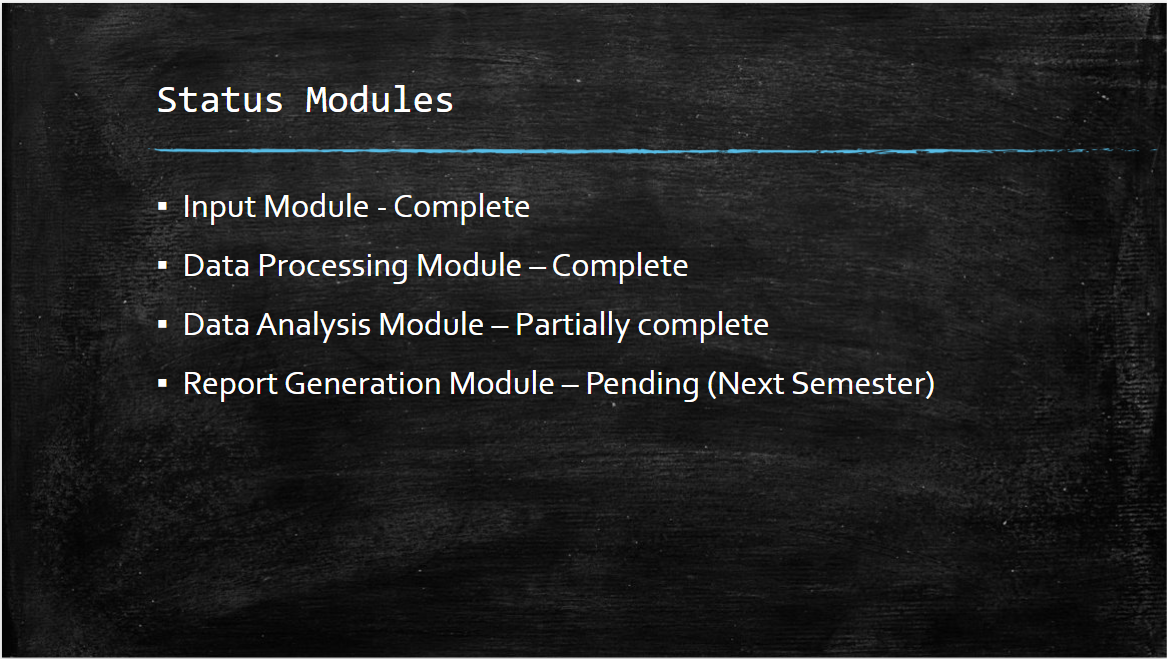

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fpdf import FPDF
from datetime import datetime
import os
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import numpy as np

In [2]:
prod_2021=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2021.xlsx', sheet_name=1)
prod_2022=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2022.xlsx', sheet_name=1)
prod_2023=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2023.xlsx', sheet_name=1)
prod_2024=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2024.xlsx', sheet_name=1)
prod_2025=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2025.xlsx', sheet_name=1)

In [3]:
curtail_2021=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2021.xlsx', sheet_name=2)
curtail_2022=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2022.xlsx', sheet_name=2)
curtail_2023=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2023.xlsx', sheet_name=2)
curtail_2024=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2024.xlsx', sheet_name=2)
curtail_2025=pd.read_excel(r'D:\_5-Harrisburg Courses\GRAD 695 Project\Project\productionandcurtailmentsdata_2025.xlsx', sheet_name=2)

# Input Module

In [10]:
#User input to view data Yearly (2021, 2022, 2023, 2024 and 2025), Monthly (Jan- Dec) 
# Also the format of the report either .pdf or .html

#Function to check valid years from the user
def years(periodrange):
        years_list = periodrange
        if all(year in {'2021', '2022', '2023', '2024', '2025'} for year in years_list):
            validyear=True
            return
        else:
            print('Invalid Year(s) entered! Please enter again.')

#Function to check valid months from the user
def months(periodyear, periodmonth):

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    if periodyear in {'2021', '2022', '2023', '2024', '2025'}:
        if all(month in months for month in periodmonth):
            validyear=True
            validmonth=True
 
        else:
            print("Invalid Month(s) entered! Please enter again.")




In [13]:
# Main Program Flow
data_period = input("Choose Period (Yearly or Monthly): ").strip().lower()

selected_years = ''
#while selected_years != 'end':
if data_period=='yearly':
    selected_years = input(f"Choose Years (2021,2022,2023,2024,2025) separated by ';' or Type 'end' to exit: ").strip().title().split(';')
    years(selected_years)

elif data_period=='monthly':
    selected_year = input("Choose Year (2021,2022,2023,2024,2025) or \n Type 'end' to exit: ").strip()
    selected_months = input(f"Choose Months (e.g., Jan, Feb, ... , Dec) separated by ';' : ").strip().title().split(';')
    months(selected_year,selected_months)


Choose Period (Yearly or Monthly):  yearly
Choose Years (2021,2022,2023,2024,2025) separated by ';' or Type 'end' to exit:  2021;2022


# Data Processing Module

In [14]:
prod_2021['Date_t']=prod_2021['Date'].dt.date
curtail_2021['Date_t']=curtail_2021['Date'].dt.date
prod_2022['Date_t']=prod_2022['Date'].dt.date
curtail_2022['Date_t']=curtail_2022['Date'].dt.date
prod_2023['Date_t']=prod_2023['Date'].dt.date
curtail_2023['Date_t']=curtail_2023['Date'].dt.date
prod_2024['Date_t']=prod_2024['Date'].dt.date
curtail_2024['Date_t']=curtail_2024['Date'].dt.date
prod_2025['Date_t']=prod_2025['Date'].dt.date
curtail_2025['Date_t']=curtail_2025['Date'].dt.date

In [15]:
data_2021=pd.merge(prod_2021,curtail_2021, on=["Date_t","Hour","Interval"],indicator=True, how='outer')
data_2022=pd.merge(prod_2022,curtail_2022, on=["Date_t","Hour","Interval"],indicator=True, how='outer')
data_2023=pd.merge(prod_2023,curtail_2023, on=["Date_t","Hour","Interval"],indicator=True, how='outer')
data_2024=pd.merge(prod_2024,curtail_2024, on=["Date_t","Hour","Interval"],indicator=True, how='outer')
data_2025=pd.merge(prod_2025,curtail_2025, on=["Date_t","Hour","Interval"],indicator=True, how='outer')


In [16]:
data_2021=data_2021.drop(['Date_y','_merge','Date_t'], axis=1)
data_2022=data_2022.drop(['Date_y','_merge','Date_t'], axis=1)
data_2023=data_2023.drop(['Date_y','_merge','Date_t'], axis=1)
data_2024=data_2024.drop(['Date_y','_merge','Date_t'], axis=1)
data_2025=data_2025.drop(['Date_y','_merge','Date_t'], axis=1)

In [17]:
data_2021.fillna(0,inplace=True)
data_2022.fillna(0,inplace=True)
data_2023.fillna(0,inplace=True)
data_2024.fillna(0,inplace=True)
data_2025.fillna(0,inplace=True)

In [18]:
data_2021.head()

Date_x  Hour  Interval          Load  Solar         Wind  \
0 2021-01-01 00:00:00     1         1  21913.533724    0.0  1307.413980   
1 2021-01-01 00:05:00     1         2  21851.062708    0.0  1280.547428   
2 2021-01-01 00:10:00     1         3  21757.692448    0.0  1275.527993   
3 2021-01-01 00:15:00     1         4  21665.410781    0.0  1267.157069   
4 2021-01-01 00:20:00     1         5  21591.160208    0.0  1234.005644   

       Net Load   Renewables      Nuclear  Large Hydro      Imports  \
0  20606.119744  2919.152694  1144.690063   696.717404  9394.253333   
1  20570.515280  2892.173787  1144.760059   702.553757  9317.693333   
2  20482.164455  2886.399630  1144.540051   700.732829  9243.680000   
3  20398.253713  2877.957856  1144.610059   700.875664  9195.320000   
4  20357.154564  2842.068588  1144.340100   688.787323  9167.493333   

     Generation      Thermal  Load Less (Generation+Imports)  \
0  12513.094766  7752.534604                        6.185625   
1  12520.098177  7780.610575                       13.271198   
2  12511.161836  7779.489326                        2.850612   
3  12465.727799  7742.284220                        4.362982   
4  12412.570755  7737.374744                       11.096120   

   Wind Curtailment  Solar Curtailment  
0               0.0                0.0  
1               0.0                0.0  
2               0.0                0.0  
3               0.0                0.0  
4               0.0                0.0

In [19]:
data_2021.isnull().sum()

Date_x                            0
Hour                              0
Interval                          0
Load                              0
Solar                             0
Wind                              0
Net Load                          0
Renewables                        0
Nuclear                           0
Large Hydro                       0
Imports                           0
Generation                        0
Thermal                           0
Load Less (Generation+Imports)    0
Wind Curtailment                  0
Solar Curtailment                 0
dtype: int64

In [20]:
big_data=pd.concat([data_2021,data_2022,data_2023,data_2024,data_2024])

In [21]:
big_data=big_data.drop(['Reason'],axis=1)


In [22]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562756 entries, 0 to 115265
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date_x                          562756 non-null  datetime64[ns]
 1   Hour                            562756 non-null  int64         
 2   Interval                        562756 non-null  int64         
 3   Load                            562756 non-null  float64       
 4   Solar                           562756 non-null  float64       
 5   Wind                            562756 non-null  float64       
 6   Net Load                        562756 non-null  float64       
 7   Renewables                      562756 non-null  float64       
 8   Nuclear                         562756 non-null  float64       
 9   Large Hydro                     562756 non-null  float64       
 10  Imports                         562756 non-null  float64

In [23]:
big_data['Month']=big_data['Date_x'].dt.month_name()
big_data['Year']=big_data['Date_x'].dt.year
big_data['Day']=big_data['Date_x'].dt.day


In [24]:
big_data.head(5)


Date_x  Hour  Interval          Load  Solar         Wind  \
0 2021-01-01 00:00:00     1         1  21913.533724    0.0  1307.413980   
1 2021-01-01 00:05:00     1         2  21851.062708    0.0  1280.547428   
2 2021-01-01 00:10:00     1         3  21757.692448    0.0  1275.527993   
3 2021-01-01 00:15:00     1         4  21665.410781    0.0  1267.157069   
4 2021-01-01 00:20:00     1         5  21591.160208    0.0  1234.005644   

       Net Load   Renewables      Nuclear  Large Hydro      Imports  \
0  20606.119744  2919.152694  1144.690063   696.717404  9394.253333   
1  20570.515280  2892.173787  1144.760059   702.553757  9317.693333   
2  20482.164455  2886.399630  1144.540051   700.732829  9243.680000   
3  20398.253713  2877.957856  1144.610059   700.875664  9195.320000   
4  20357.154564  2842.068588  1144.340100   688.787323  9167.493333   

     Generation      Thermal  Load Less (Generation+Imports)  \
0  12513.094766  7752.534604                        6.185625   
1  12520.098177  7780.610575                       13.271198   
2  12511.161836  7779.489326                        2.850612   
3  12465.727799  7742.284220                        4.362982   
4  12412.570755  7737.374744                       11.096120   

   Wind Curtailment  Solar Curtailment    Month  Year  Day  
0               0.0                0.0  January  2021    1  
1               0.0                0.0  January  2021    1  
2               0.0                0.0  January  2021    1  
3               0.0                0.0  January  2021    1  
4               0.0                0.0  January  2021    1

In [25]:
selected_years

['2021', '2022']

# Data Analysis Module

In [26]:
def df_monthly(df_year):
    data_month=df_year.copy()
    data_month['Month']=df_year['Date_x'].dt.month
    df_byMonth=pd.pivot_table(data_month, values=[ 'Solar', 'Wind','Nuclear', 'Large Hydro', 'Imports','Thermal'],index=data_month.Month)
    mon=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
    df_byMonth['Month']=mon
    df_byMonth=df_byMonth.set_index('Month')
    
    df_byMonth.plot(kind='bar', stacked=True)
    yearly_chart_path = "yearly_chart.png"
    plt.xlabel(f'Months')
    plt.ylabel('Power MW')
    plt.tight_layout() 
    plt.savefig(yearly_chart_path)  
    plt.close()  
    
    return df_byMonth

Text(0, 0.5, 'Power MW')

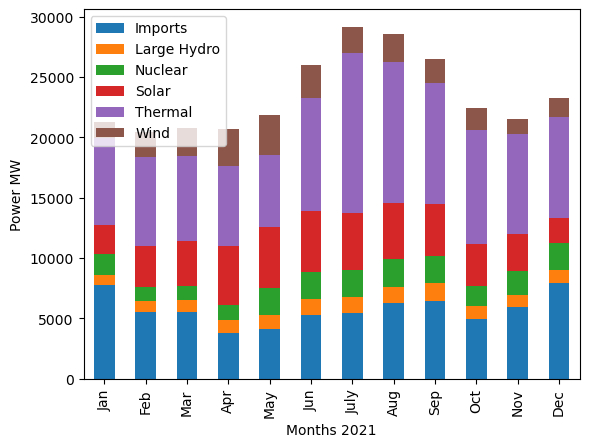

In [27]:
test_month=df_monthly(data_2021)
test_month.plot(kind='bar', stacked=True)

plt.xlabel(f'Months 2021')
plt.ylabel('Power MW')



In [28]:
def pattern_finder(df):
    df2=df.copy()
    for col in df2.columns:
        avg=df2[col].mean()
        sd=df2[col].std()
        df2[col]=df2[col].apply(lambda x: (x-avg)/sd)
        
    kmeans=KMeans(n_clusters=3, n_init='auto')
    kmeans.fit(df2)
    df2['cluster']=kmeans.labels_
    df2.cluster.value_counts()
    centroids = kmeans.cluster_centers_
    
    plt.scatter(x=df2['Load'], y=df2['Thermal'], c=df2['cluster'], cmap='rainbow')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50, cmap='rainbow')
    plt.xlabel('Load /n 2021')
    plt.ylabel('Thermal')

   
    scatter_chart_path = "scatter_plot.png"
    plt.tight_layout() 
    plt.savefig(scatter_chart_path)
    plt.close()  
    
    return df2, centroids
    
    

C:\Users\rrohi\AppData\Local\Temp\ipykernel_34796\240125358.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50, cmap='rainbow')
C:\Users\rrohi\AppData\Local\Temp\ipykernel_34796\3444039863.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(test_centroids[:, 0], test_centroids[:, 1], c='green', s=50, cmap='rainbow')


Text(0, 0.5, 'Thermal\n 2021')

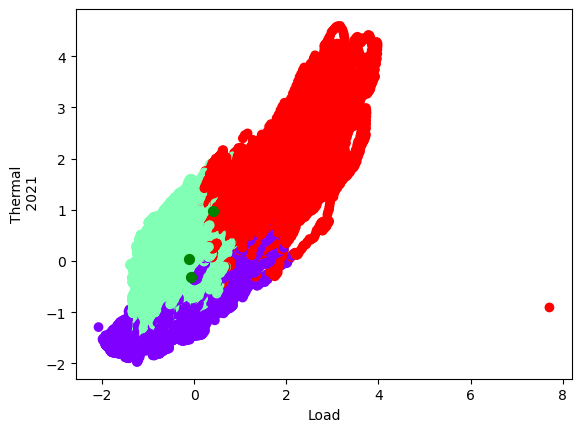

In [29]:
test_pattern, test_centroids=pattern_finder(data_2021)
plt.scatter(x=test_pattern['Load'], y=test_pattern['Thermal'], c=test_pattern['cluster'], cmap='rainbow')
plt.scatter(test_centroids[:, 0], test_centroids[:, 1], c='green', s=50, cmap='rainbow')
plt.xlabel('Load')
plt.ylabel('Thermal\n 2021')

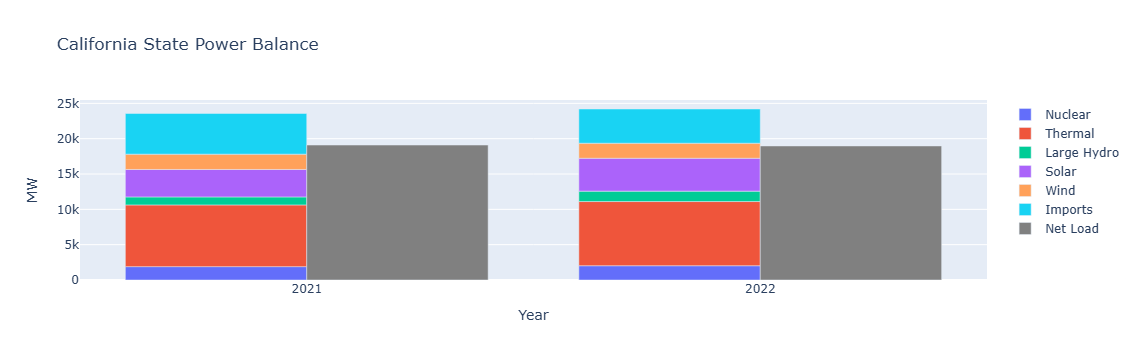

In [30]:
#For Yearly Data report
data_year=big_data.copy()
df_data_year=pd.pivot_table(data_year, values=[ 'Solar', 'Wind','Nuclear', 'Large Hydro', 'Imports','Thermal','Net Load'],index=data_year.Year)

# Data
labels = selected_years
cat1 = df_data_year['Nuclear']
cat2 = df_data_year[ 'Thermal']
cat3 = df_data_year['Large Hydro']
cat4 = df_data_year[ 'Solar']
cat5 = df_data_year['Wind']
cat6 = df_data_year['Imports']
cat7 =df_data_year['Net Load']

#cat2 = [4, 2, 5]
#total = [10, 12, 9]

fig = go.Figure()

# Group 1: Stacked bars (Cat 1 + Cat 2)
fig.add_trace(go.Bar(
    x=labels,
    y=cat1,
    name=cat1.name,
    offsetgroup=0,
    base=None
))
fig.add_trace(go.Bar(
    x=labels,
    y=cat2,
    name=cat2.name,
    offsetgroup=0,
    base=np.array(cat1)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat3,
    name=cat3.name,
    offsetgroup=0,
    base=np.array(cat1)+np.array(cat2)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat4,
    name=cat4.name,
    offsetgroup=0,
    base=np.array(cat1)+np.array(cat2)+np.array(cat3)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat5,
    name=cat5.name,
    offsetgroup=0,
    base=np.array(cat1)+np.array(cat2)+np.array(cat3)+np.array(cat4)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat6,
    name=cat6.name,
    offsetgroup=0,
    base=np.array(cat1)+np.array(cat2)+np.array(cat3)+np.array(cat4)+ np.array(cat5)
))

fig.add_trace(go.Bar(
    x=labels,
    y=cat7,
    name=cat7.name,
    offsetgroup=1,  # Different group
    marker_color='gray'
))


fig.update_layout(
    title='California State Power Balance',
    barmode='group',  
    xaxis_title='Year',
    yaxis_title='MW',
    bargap=0.2,
)

fig.show()

# Report Generation Module